In [1]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Sequential, load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
label = {
    0:'aeroplane',
    1:'bicycle',
    2:'bird',
    3:'boat',
    4:'bottle',
    5:'bus',
    6:'car',
    7:'cat',
    8:'chair',
    9:'cow',
    10:'diningtable',
    11:'dog',
    12:'horse',
    13:'motorbike',
    14:'person',
    15:'pottedplant',
    16:'sheep',
    17:'sofa',
    18:'train',
    19:'tvmonitor'
} 

In [3]:
#Connessione a Google Drive, rende possibile accedere a file e cartelle contenuti in 'Il mio Drive' 
#Eseguire solo se i dataset sono salvati non in locale ma in Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Caricamento del modello in formato '.json' e dei relativi pesi in formato '.h5'

json_file = open('../Modelli_json/model_VGG19_multi_task.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights(r"/content/drive/My Drive/weights_VGG19_multi_task.h5")

# Test

In [0]:
import os

path = '/content/drive/My Drive/test_splitted/test/'
predictions = list()
filenames = list()
counter = 1
for image_path in os.listdir(path):
  
  filenames.append(image_path)
  input_path = os.path.join(path, image_path)
  img = image.load_img(input_path,target_size=(224, 224))
  img = image.img_to_array(img)
  img = preprocess_input(img)

  pred = model.predict(np.array([img]))
  predictions.append(np.array([p[0][0] for p in pred]))
  counter += 1
  
predictions = np.array(predictions)
num_of_images_to_test = counter-1
  
  

In [0]:
#Creazione del csv contenente il nome delle immagini e le relative label predette

pred_bool = (predictions > 0.5)

list_predictions = list()

for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(str(1))
        else:
            l.append(str(0))
    list_predictions.append(",".join(l))
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":list_predictions})
results = results.sort_values(by = 'Filename')
results.to_csv("results_multi_task.csv",index=False)

# Comparazione con gTruth

In [0]:
#Comparision between test labels and predictions
import pandas as pd

df_label = pd.read_csv('../CSV_dataset/test_labeled.csv', encoding = "ISO-8859-2")
df_pred = pd.read_csv('../CSV_risultati/results_multi_task.csv', encoding = "ISO-8859-2")


In [48]:
print(df_label.head(5))
print(df_pred.head(5))

         image                                    class
0  2008_000076  0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1  2008_000082  0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2  2008_000116  0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3  2008_000123  0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4  2008_000134  0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
          Filename                              Predictions
0  2008_000076.jpg  0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1  2008_000082.jpg  0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2  2008_000116.jpg  0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3  2008_000123.jpg  0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4  2008_000134.jpg  1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
gtruth_list = list()
pred_list = list()
for lb, pr in zip(df_label.iterrows(), df_pred.iterrows()):

  lb_arr = (lb[1][1].split(','))
  pr_arr = (pr[1][1].split(','))
  lb_arr = list(map(int, lb_arr))
  pr_arr = list(map(int, pr_arr))
  gtruth_list.append(lb_arr)
  pred_list.append(pr_arr)


In [50]:
from sklearn.metrics import hamming_loss, accuracy_score

print('Accuracy: ')
print(accuracy_score(np.array(gtruth_list), np.array(pred_list)))
print('Hamming-loss: ')
print(hamming_loss(np.array(gtruth_list), np.array(pred_list)))

Accuracy: 
0.4351464435146444
Hamming-loss: 
0.04365411436541144


Stampa esempi

In [0]:
def out_prediction(prediction, img):
  found = list()
  indici = list()
  for i in range(20):
    if(prediction[i][0][0]>0.5):
      found.append(prediction[i][0][0])
      indici.append(i)

  for i in range(len(found)):
    print(label[indici[i]])

  imgplot = plt.imshow(img)
  plt.show()

person


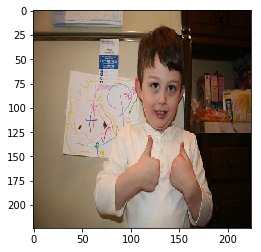

person


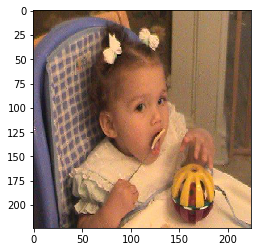

motorbike
person


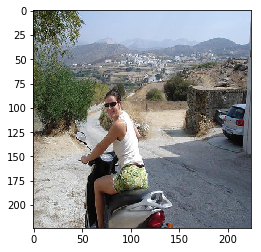

bottle
person


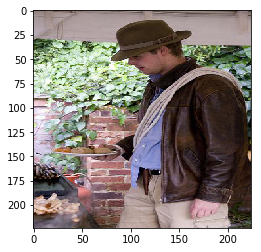

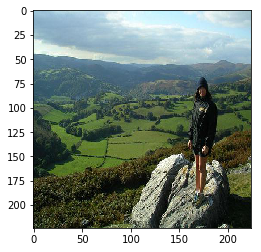

dog


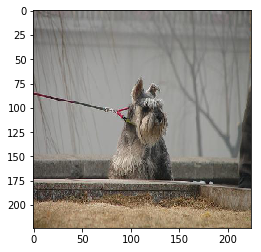

person


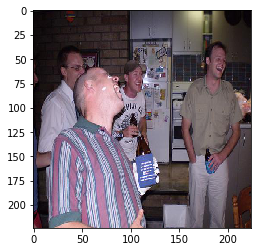

bird


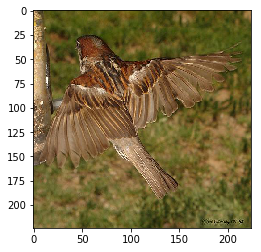

person


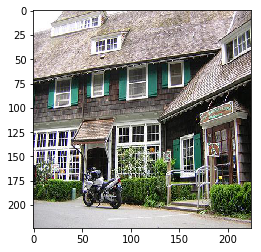

cat


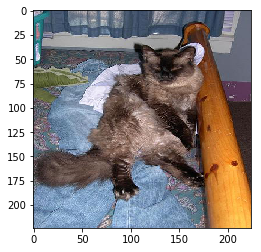

In [57]:
#Di seguito alcuni esempi

i=0
for f_n in filenames[30:40]:
    img=image.load_img('/content/drive/My Drive/test_splitted/test/' + f_n,target_size=(224, 224))
    
    img2 = image.img_to_array(img)
    img2 = preprocess_input(img2)
    
    prediction = model.predict(np.array([img2]))
    out_prediction(prediction, img)